In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set()

In [ ]:
# Let's load in the data using pandas

cali_aqi = pd.read_csv("California_airquality.csv")
covid = pd.read_csv("covid_us_county.csv")

In [ ]:
# Let's take a look at the California Air Quality pandas data frame
cali_aqi

Date Source   Site ID  POC  Daily Mean PM2.5 Concentration  \
0       1/1/20    AQS  60010007    3                             8.6   
1       1/2/20    AQS  60010007    3                             4.5   
2       1/3/20    AQS  60010007    3                            14.2   
3       1/4/20    AQS  60010007    3                            10.9   
4       1/5/20    AQS  60010007    3                             7.8   
...        ...    ...       ...  ...                             ...   
30510  3/28/20    AQS  61131003    1                             1.0   
30511   4/3/20    AQS  61131003    1                             1.0   
30512  4/15/20    AQS  61131003    1                             6.5   
30513  4/21/20    AQS  61131003    1                             7.2   
30514  4/27/20    AQS  61131003    1                             5.5   

          UNITS  DAILY_AQI_VALUE             Site Name  DAILY_OBS_COUNT  \
0      ug/m3 LC               36             Livermore                1   
1      ug/m3 LC               19             Livermore                1   
2      ug/m3 LC               55             Livermore                1   
3      ug/m3 LC               45             Livermore                1   
4      ug/m3 LC               33             Livermore                1   
...         ...              ...                   ...              ...   
30510  ug/m3 LC                4  Woodland-Gibson Road                1   
30511  ug/m3 LC                4  Woodland-Gibson Road                1   
30512  ug/m3 LC               27  Woodland-Gibson Road                1   
30513  ug/m3 LC               30  Woodland-Gibson Road                1   
30514  ug/m3 LC               23  Woodland-Gibson Road                1   

       PERCENT_COMPLETE  AQS_PARAMETER_CODE        AQS_PARAMETER_DESC  \
0                   100               88101  PM2.5 - Local Conditions   
1                   100               88101  PM2.5 - Local Conditions   
2                   100               88101  PM2.5 - Local Conditions   
3                   100               88101  PM2.5 - Local Conditions   
4                   100               88101  PM2.5 - Local Conditions   
...                 ...                 ...                       ...   
30510               100               88101  PM2.5 - Local Conditions   
30511               100               88101  PM2.5 - Local Conditions   
30512               100               88101  PM2.5 - Local Conditions   
30513               100               88101  PM2.5 - Local Conditions   
30514               100               88101  PM2.5 - Local Conditions   

       CBSA_CODE                                CBSA_NAME  STATE_CODE  \
0        41860.0        San Francisco-Oakland-Hayward, CA           6   
1        41860.0        San Francisco-Oakland-Hayward, CA           6   
2        41860.0        San Francisco-Oakland-Hayward, CA           6   
3        41860.0        San Francisco-Oakland-Hayward, CA           6   
4        41860.0        San Francisco-Oakland-Hayward, CA           6   
...          ...                                      ...         ...   
30510    40900.0  Sacramento--Roseville--Arden-Arcade, CA           6   
30511    40900.0  Sacramento--Roseville--Arden-Arcade, CA           6   
30512    40900.0  Sacramento--Roseville--Arden-Arcade, CA           6   
30513    40900.0  Sacramento--Roseville--Arden-Arcade, CA           6   
30514    40900.0  Sacramento--Roseville--Arden-Arcade, CA           6   

            STATE  COUNTY_CODE   COUNTY  SITE_LATITUDE  SITE_LONGITUDE  
0      California            1  Alameda      37.687526     -121.784217  
1      California            1  Alameda      37.687526     -121.784217  
2      California            1  Alameda      37.687526     -121.784217  
3      California            1  Alameda      37.687526     -121.784217  
4      California            1  Alameda      37.687526     -121.784217  
...           ...          ...      ...            .

In [ ]:
# Let's do the same for covid data
covid

fips   county    state        lat        long        date  cases  \
0        1001.0  Autauga  Alabama  32.539527  -86.644082  2020-01-22      0   
1        1001.0  Autauga  Alabama  32.539527  -86.644082  2020-01-23      0   
2        1001.0  Autauga  Alabama  32.539527  -86.644082  2020-01-24      0   
3        1001.0  Autauga  Alabama  32.539527  -86.644082  2020-01-25      0   
4        1001.0  Autauga  Alabama  32.539527  -86.644082  2020-01-26      0   
...         ...      ...      ...        ...         ...         ...    ...   
841675  56045.0   Weston  Wyoming  43.839612 -104.567488  2020-09-25     35   
841676  56045.0   Weston  Wyoming  43.839612 -104.567488  2020-09-26     36   
841677  56045.0   Weston  Wyoming  43.839612 -104.567488  2020-09-27     36   
841678  56045.0   Weston  Wyoming  43.839612 -104.567488  2020-09-28     36   
841679  56045.0   Weston  Wyoming  43.839612 -104.567488  2020-09-29     37   

       state_code  deaths  
0              AL       0  
1              AL       0  
2              AL       0  
3              AL       0  
4              AL       0  
...           ...     ...  
841675         WY       0  
841676         WY       0  
841677         WY       0  
841678         WY       0  
841679         WY       0  

[841680 rows x 9 columns]

In [ ]:
cali_aqi = cali_aqi[['Date', 'COUNTY', 'DAILY_AQI_VALUE']]
cali_aqi['Date'] = pd.to_datetime(cali_aqi['Date'], format='%m/%d/%y').dt.strftime('%Y-%m-%d')
cali_aqi

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Date   COUNTY  DAILY_AQI_VALUE
0      2020-01-01  Alameda               36
1      2020-01-02  Alameda               19
2      2020-01-03  Alameda               55
3      2020-01-04  Alameda               45
4      2020-01-05  Alameda               33
...           ...      ...              ...
30510  2020-03-28     Yolo                4
30511  2020-04-03     Yolo                4
30512  2020-04-15     Yolo               27
30513  2020-04-21     Yolo               30
30514  2020-04-27     Yolo               23

[30515 rows x 3 columns]

In [ ]:
covid= covid[['date', 'county', 'state', 'cases', 'deaths']]
covid=covid.loc[covid['state']=='California']

covid

date   county       state  cases  deaths
49140  2020-01-22  Alameda  California      0       0
49141  2020-01-23  Alameda  California      0       0
49142  2020-01-24  Alameda  California      0       0
49143  2020-01-25  Alameda  California      0       0
49144  2020-01-26  Alameda  California      0       0
...           ...      ...         ...    ...     ...
64255  2020-09-25     Yuba  California   1143       7
64256  2020-09-26     Yuba  California   1153       7
64257  2020-09-27     Yuba  California   1153       7
64258  2020-09-28     Yuba  California   1153       7
64259  2020-09-29     Yuba  California   1158       8

[15120 rows x 5 columns]

In [ ]:
covid = covid.rename(columns = {"date": "Date", "county": "COUNTY"})
air_and_covid = pd.merge(cali_aqi, covid) #Date is the only column name that matches so it joins there
air_and_covid = air_and_covid.rename(columns = { "COUNTY": "County", "DAILY_AQI_VALUE": "Daily_Aqi_Value", "state": "State", "cases": "Cases", "deaths":"Deaths"})
air_and_covid

Date   County  Daily_Aqi_Value       State  Cases  Deaths
0      2020-01-22  Alameda               15  California      0       0
1      2020-01-22  Alameda               21  California      0       0
2      2020-01-22  Alameda               18  California      0       0
3      2020-01-22  Alameda               31  California      0       0
4      2020-01-22  Alameda               37  California      0       0
...           ...      ...              ...         ...    ...     ...
27423  2020-09-06     Yolo              159  California   2541      53
27424  2020-09-07     Yolo              151  California   2564      53
27425  2020-09-08     Yolo              152  California   2565      53
27426  2020-09-09     Yolo              115  California   2597      53
27427  2020-09-10     Yolo              151  California   2611      53

[27428 rows x 6 columns]

In [ ]:
# Getting rid of counties with small amount of data
invalid_counties = ['Del Norte','El Dorado', 'Humboldt', 'Lake', 'Mendocino', 'Plumas','Shasta', 'Siskiyou' , 'Tehama', 'Trinity']
for county in invalid_counties:
    air_and_covid = air_and_covid[air_and_covid.County != county]

# ['Del Norte','El Dorado', 'Humboldt', 'Lake', 'Mendocino', 'Shasta', 'Tehama', 'Trinity']]
air_and_covid

Date   County  Daily_Aqi_Value       State  Cases  Deaths
0      2020-01-22  Alameda               15  California      0       0
1      2020-01-22  Alameda               21  California      0       0
2      2020-01-22  Alameda               18  California      0       0
3      2020-01-22  Alameda               31  California      0       0
4      2020-01-22  Alameda               37  California      0       0
...           ...      ...              ...         ...    ...     ...
27423  2020-09-06     Yolo              159  California   2541      53
27424  2020-09-07     Yolo              151  California   2564      53
27425  2020-09-08     Yolo              152  California   2565      53
27426  2020-09-09     Yolo              115  California   2597      53
27427  2020-09-10     Yolo              151  California   2611      53

[26036 rows x 6 columns]

In [ ]:
counties = air_and_covid.County.unique()
print(counties)

['Alameda' 'Butte' 'Calaveras' 'Colusa' 'Contra Costa' 'Fresno' 'Glenn'
 'Imperial' 'Inyo' 'Kern' 'Kings' 'Los Angeles' 'Madera' 'Marin'
 'Mariposa' 'Merced' 'Mono' 'Monterey' 'Napa' 'Nevada' 'Orange' 'Placer'
 'Riverside' 'Sacramento' 'San Benito' 'San Bernardino' 'San Diego'
 'San Francisco' 'San Joaquin' 'San Luis Obispo' 'San Mateo'
 'Santa Barbara' 'Santa Clara' 'Santa Cruz' 'Solano' 'Sonoma' 'Stanislaus'
 'Sutter' 'Tulare' 'Ventura' 'Yolo']


In [ ]:
# Takes in a series and divides each entry by the max entry
def lazy_norm(df_series):
    return df_series/df_series.max()

def lazy_norm_array(array):
    return array/np.max(array)

KeyboardInterrupt: 

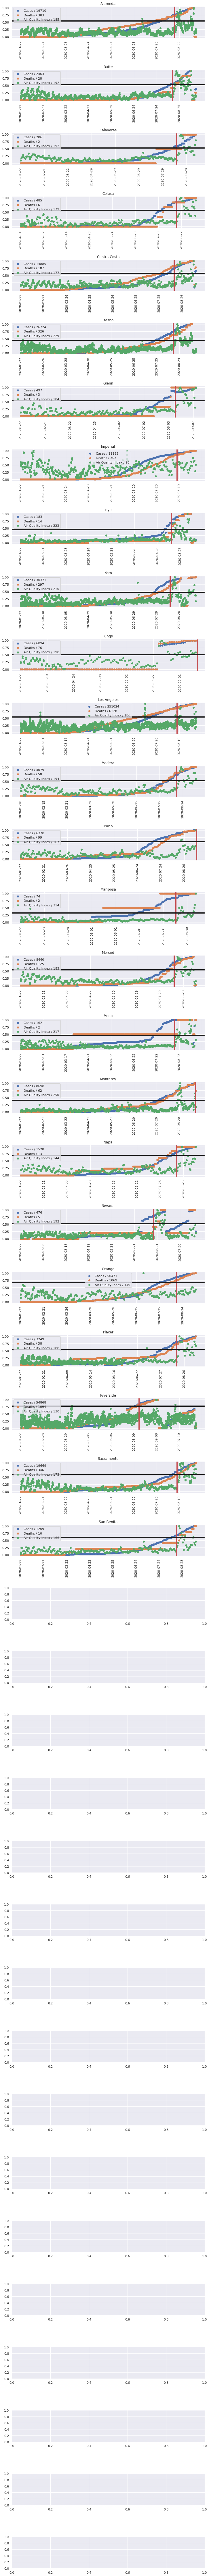

In [ ]:
'''

Plot of the cummulative COVID-19 deaths, cases and Air Quality Index (AQI) value for each county 
normalized by the maximum count for each category

AQI > 100 is considered unhealthy for sensitive groups

'''

fig, axs = plt.subplots(counties.size, 1, figsize=(12, 4*counties.size))

# blue dots = covid deaths, orange dots = air quality
for i, county in enumerate(counties):
    ax = plt.subplot(counties.size,1,i+1)

    county_dates = air_and_covid['Date'].loc[air_and_covid['County'] == county]
    county_cases = air_and_covid['Cases'].loc[air_and_covid['County'] == county]
    county_deaths = air_and_covid['Deaths'].loc[air_and_covid['County'] == county]
    county_aqi = air_and_covid['Daily_Aqi_Value'].loc[air_and_covid['County'] == county]

    plt.scatter(county_dates, lazy_norm(county_cases))
    plt.scatter(county_dates, lazy_norm(county_deaths))
    plt.scatter(county_dates, lazy_norm(county_aqi))
    
    ax.xaxis.set_major_locator(plt.MaxNLocator(9))
    plt.xticks(rotation='vertical')
    plt.legend(['Cases / ' + str(county_cases.max()), 'Deaths / ' + str(county_deaths.max()), 'Air Quality Index / ' + str(county_aqi.max())])
    plt.axvline(x="2020-08-16", linewidth = 4, color = 'r', label = 'Start of Fire Season')
    if (county_aqi.max() > 100):
        plt.axhline(y=(100/county_aqi.max()), color='k', linewidth = 4)
    plt.title(county)
    fig.subplots_adjust(hspace=1.0)

    # every_nth = 25
    # for n, label in enumerate(ax.xaxis.get_ticklabels()):
    #     if n % every_nth != 0:
    #         label.set_visible(False)

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in true_divide


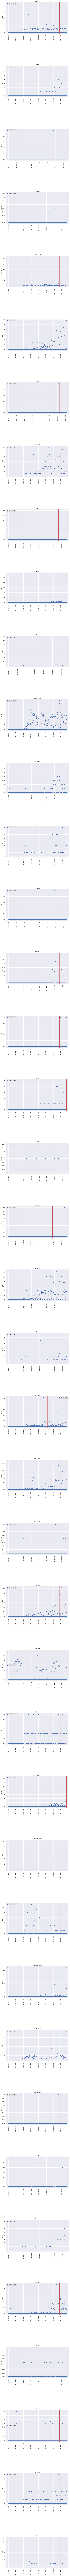

In [ ]:
'''

Plot of the day-by-day (non-cummulative) COVID-19 deaths, cases and Air Quality Index (AQI) value for each county 
normalized by the maximum count for each category

'''

fig, axs = plt.subplots(counties.size, 1, figsize=(12, 12*counties.size))

# blue dots = covid deaths, orange dots = air quality
for i, county in enumerate(counties):
    ax = plt.subplot(counties.size,1,i+1)


    county_dates = air_and_covid['Date'].loc[air_and_covid['County'] == county]
    county_cases = air_and_covid['Cases'].loc[air_and_covid['County'] == county]
    county_deaths = air_and_covid['Deaths'].loc[air_and_covid['County'] == county]
    county_aqi = air_and_covid['Daily_Aqi_Value'].loc[air_and_covid['County'] == county]

    # Convert pandas series into nupmy arrays
    county_cases = np.array(county_cases)
    county_deaths = np.array(county_deaths)
    county_aqi = np.array(county_aqi)

    # Convert cumulative arrays into day-by-day values
    county_aqi = np.array(county_aqi)
    dbd_county_deaths = np.diff(county_deaths)
    dbd_county_cases = np.diff(county_cases)

    # Take all negative values and set equal to zero
    dbd_county_cases[dbd_county_cases < 0] = 0
    dbd_county_deaths[dbd_county_deaths < 0] = 0

    # Insert 0 to first entry of each array to start with 0 cases and deaths
    dbd_county_deaths = np.insert(dbd_county_deaths,0,0)
    dbd_county_cases = np.insert(dbd_county_cases,0,0)
    
    # Calculating covid death rate and rounding elements of array to 8 decimal places
    dbd_county_death_rate = (dbd_county_deaths/dbd_county_cases)
    dbd_county_death_rate[dbd_county_death_rate == np.inf] = 1. # Setting all (deathrate = num/0) inf to 1.
    dbd_county_death_rate = np.round(np.nan_to_num(dbd_county_death_rate), 8)

    # plt.scatter(county_dates,dbd_county_death_rate)
    plt.scatter(county_dates, dbd_county_deaths)
    
    ax.xaxis.set_major_locator(plt.MaxNLocator(9))
    plt.xticks(rotation='vertical')
    plt.legend(['Covid Deaths'])
    # plt.legend(['Deaths / ' + str(np.max(dbd_county_death_rate)), 'Air Quality Index / ' + str(np.max(county_aqi))])
    plt.axvline(x="2020-08-16", linewidth = 4, color = 'r', label = 'Start of Fire Season')
    # if (np.max(county_aqi) > 100):
    #     plt.axhline(y=(100/np.max(county_aqi)), color='k', linewidth = 4)
    plt.title(county)
    plt.ylabel('Deaths')
    fig.subplots_adjust(hspace=1.0)

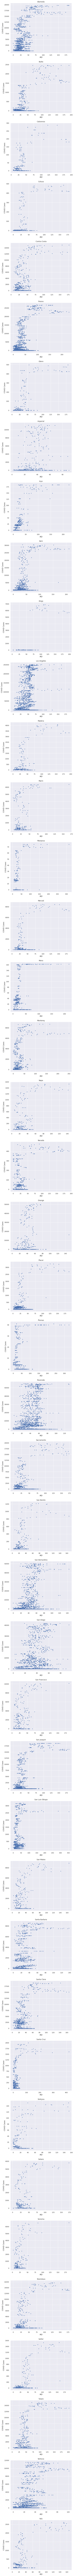

In [ ]:
'''

Plot Air Quality Index (AQI) vs COVID-19 Cases value for each county

'''

fig, axs = plt.subplots(counties.size, 1, figsize=(8, 8*counties.size))

# blue dots = covid deaths, orange dots = air quality
for i, county in enumerate(counties):
    ax = plt.subplot(counties.size,1,i+1)


    # county_dates = air_and_covid['Date'].loc[air_and_covid['County'] == county]
    county_cases = air_and_covid['Cases'].loc[air_and_covid['County'] == county]
    # county_deaths = air_and_covid['Deaths'].loc[air_and_covid['County'] == county]
    county_aqi = air_and_covid['Daily_Aqi_Value'].loc[air_and_covid['County'] == county]

    # Convert pandas series into nupmy arrays
    county_aqi = np.array(county_aqi)
    county_cases = np.array(county_cases)
    # county_deaths = np.array(county_deaths)

    plt.plot(county_aqi, county_cases, '.')
    plt.xlabel('AQI')
    plt.ylabel('COVID Cases')
    plt.title(county)

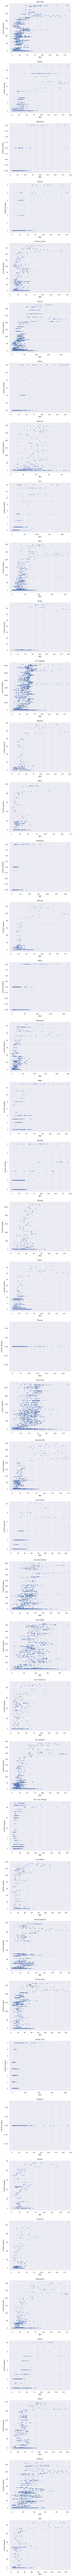

In [ ]:
'''

Plot Air Quality Index (AQI) vs COVID-19 Deaths value for each county

'''

fig, axs = plt.subplots(counties.size, 1, figsize=(8, 8*counties.size))

# blue dots = covid deaths, orange dots = air quality
for i, county in enumerate(counties):
    ax = plt.subplot(counties.size,1,i+1)


    # county_dates = air_and_covid['Date'].loc[air_and_covid['County'] == county]
    # county_cases = air_and_covid['Cases'].loc[air_and_covid['County'] == county]
    county_deaths = air_and_covid['Deaths'].loc[air_and_covid['County'] == county]
    county_aqi = air_and_covid['Daily_Aqi_Value'].loc[air_and_covid['County'] == county]

    # Convert pandas series into nupmy arrays
    county_aqi = np.array(county_aqi)
    # county_cases = np.array(county_cases)
    county_deaths = np.array(county_deaths)

    plt.plot(county_aqi, county_deaths, '.')
    plt.xlabel('AQI')
    plt.ylabel('COVID Deaths')
    plt.title(county)

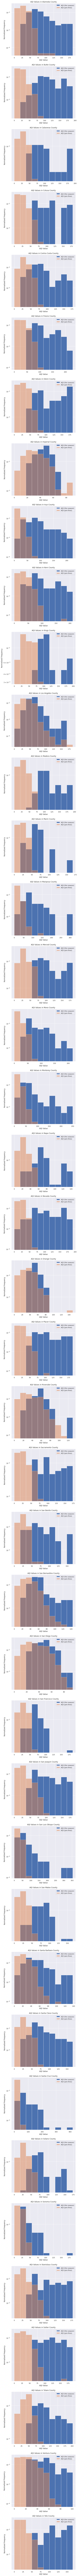

In [ ]:
'''

Histogram of Air Quality Index (AQI) for each county pre-fires and during fire season

'''

fig, axs = plt.subplots(counties.size, 1, figsize=(8, 8*counties.size))

# pre_fire_aqi_avg = np.zeros(counties.size)
# pre_fire_aqi_std = np.zeros(counties.size)
# fire_aqi_avg = np.zeros(counties.size)
# fire_aqi_std = np.zeros(counties.size)

for i, county in enumerate(counties):
    ax = plt.subplot(counties.size,1,i+1)

    # Arrays AQI values prior to the fire seasons and during the fire season
    pre_fire_aqi = air_and_covid.loc[air_and_covid['County'] == county]
    pre_fire_aqi = pre_fire_aqi['Daily_Aqi_Value'].loc[pre_fire_aqi['Date'] < '2020-08-01']
    fire_aqi = air_and_covid.loc[air_and_covid['County'] == county]
    fire_aqi = fire_aqi['Daily_Aqi_Value'].loc[fire_aqi['Date'] > '2020-08-16']

    pre_fire_aqi = np.array(pre_fire_aqi)
    fire_aqi = np.array(fire_aqi)

    hist_range_max = pre_fire_aqi.max() if pre_fire_aqi.max() > fire_aqi.max() else fire_aqi.max()


    plt.title("AQI Values in " + county + " County")
    plt.hist(fire_aqi, density=True, bins=10,range=(0,hist_range_max))
    plt.hist(pre_fire_aqi, density=True, bins=10, range=(0,hist_range_max), alpha=0.5)
    plt.legend(["AQI (fire season)", "AQI (pre-fire season)"])
    plt.xlabel("AQI Value")
    plt.ylabel("Normalized Frequency")
    plt.yscale("log")

    # pre_fire_aqi_avg[i] = np.mean(pre_fire_aqi)
    # pre_fire_aqi_std[i] = np.std(pre_fire_aqi)
    # fire_aqi_avg[i] = np.std(fire_aqi)
    # fire_aqi_std[i] = np.std(fire_aqi)

    # print("Average AQI (pre-fire) for " + county + " County = " + str(round(np.mean(pre_fire_aqi),0)) + " +/- " + str(round(np.std(pre_fire_aqi),0)))
    # print("Average AQI (fire season) for " + county + " County = " + str(round(np.mean(fire_aqi),0)) + " +/- " + str(round(np.std(fire_aqi),0)))

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide


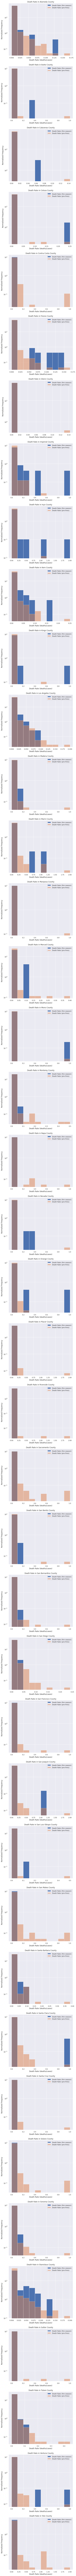

In [ ]:
'''

Histogram of Covid Death Rate (Deaths/Cases) for each county pre-fires and during fire season

'''

fig, axs = plt.subplots(counties.size, 1, figsize=(8, 8*counties.size))

for i, county in enumerate(counties):
    ax = plt.subplot(counties.size,1,i+1)

    # Array of covid cases prior to the fire seasons and during the fire season
    pre_fire_cases = air_and_covid.loc[air_and_covid['County'] == county]
    pre_fire_cases = pre_fire_cases['Cases'].loc[pre_fire_cases['Date'] < '2020-08-01']
    fire_cases = air_and_covid.loc[air_and_covid['County'] == county]
    fire_cases = fire_cases['Cases'].loc[fire_cases['Date'] > '2020-08-16']

    # Array of deaths prior to the fire seasons and during the fire season
    pre_fire_deaths = air_and_covid.loc[air_and_covid['County'] == county]
    pre_fire_deaths = pre_fire_deaths['Deaths'].loc[pre_fire_deaths['Date'] < '2020-08-01']
    fire_deaths = air_and_covid.loc[air_and_covid['County'] == county]
    fire_deaths = fire_deaths['Deaths'].loc[fire_deaths['Date'] > '2020-08-16']

    # Convert pandas series into nupmy arrays
    pre_fire_cases = np.array(pre_fire_cases)
    fire_cases = np.array(fire_cases)
    pre_fire_deaths = np.array(pre_fire_deaths)
    fire_deaths = np.array(fire_deaths)

    # Convert cumulative arrays into day-by-day values
    dbd_pre_fire_cases = np.diff(pre_fire_cases)
    dbd_fire_cases = np.diff(fire_cases)
    dbd_pre_fire_deaths = np.diff(pre_fire_deaths)
    dbd_fire_deaths = np.diff(fire_deaths)

    # Take all negative values and set equal to zero
    dbd_pre_fire_cases[dbd_pre_fire_cases < 0] = 0
    dbd_pre_fire_deaths[dbd_pre_fire_deaths < 0] = 0
    dbd_fire_cases[dbd_fire_cases < 0] = 0
    dbd_fire_deaths[dbd_fire_deaths < 0] = 0
    
    # Calculating covid death rate and rounding elements of array to 8 decimal places
    dbd_pre_fire_death_rate = (dbd_pre_fire_deaths/dbd_pre_fire_cases)
    dbd_fire_death_rate = (dbd_fire_deaths/dbd_fire_cases)
    dbd_pre_fire_death_rate[dbd_pre_fire_death_rate == np.inf] = 1. # Setting all (deathrate = num/0) inf to 1.
    dbd_fire_death_rate[dbd_fire_death_rate == np.inf] = 1. # Setting all (deathrate = num/0) inf to 1.

    dbd_pre_fire_death_rate = np.round(np.nan_to_num(dbd_pre_fire_death_rate), 16)
    dbd_fire_death_rate = np.round(np.nan_to_num(dbd_fire_death_rate), 16)

    hist_range_max = dbd_pre_fire_death_rate.max() if dbd_pre_fire_death_rate.max() > dbd_fire_death_rate.max() else dbd_fire_death_rate.max()

    plt.title("Death Rate in " + county + " County")
    plt.hist(dbd_fire_death_rate, density=True, bins = 10,range=(0,hist_range_max))
    plt.hist(dbd_pre_fire_death_rate, density=True, bins = 10,range=(0,hist_range_max),alpha=0.5)
    plt.legend(["Death Rate (fire season)", "Death Rate (pre-fire season)"])
    plt.xlabel("Death Rate (deaths/cases)")
    plt.ylabel("Normalized Frequency")
    plt.yscale("log")

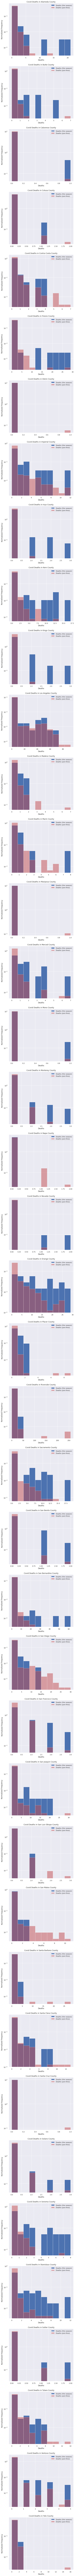

In [ ]:
'''

Histogram of Covid Deaths for each county pre-fires and during fire season

'''

fig, axs = plt.subplots(counties.size, 1, figsize=(8, 8*counties.size))

for i, county in enumerate(counties):
    ax = plt.subplot(counties.size,1,i+1)

    # Array of deaths prior to the fire seasons and during the fire season
    pre_fire_deaths = air_and_covid.loc[air_and_covid['County'] == county]
    pre_fire_deaths = pre_fire_deaths['Deaths'].loc[pre_fire_deaths['Date'] < '2020-08-01']
    fire_deaths = air_and_covid.loc[air_and_covid['County'] == county]
    fire_deaths = fire_deaths['Deaths'].loc[fire_deaths['Date'] > '2020-08-16']

    # Convert pandas series into nupmy arrays
    pre_fire_deaths = np.array(pre_fire_deaths)
    fire_deaths = np.array(fire_deaths)

    # Convert cumulative arrays into day-by-day values
    dbd_pre_fire_deaths = np.diff(pre_fire_deaths)
    dbd_fire_deaths = np.diff(fire_deaths)

    # Take all negative values and set equal to zero
    dbd_pre_fire_deaths[dbd_pre_fire_deaths < 0] = 0
    dbd_fire_deaths[dbd_fire_deaths < 0] = 0

    hist_range_max = dbd_pre_fire_deaths.max() if dbd_pre_fire_deaths.max() > dbd_fire_deaths.max() else dbd_fire_deaths.max()

# weights=(dbd_pre_fire_deaths.size/dbd_fire_deaths.size)*np.ones_like(dbd_fire_deaths)

    plt.title("Covid Deaths in " + county + " County")
    plt.hist(dbd_fire_deaths, bins=10, range=(0,hist_range_max), density=True)
    plt.hist(dbd_pre_fire_deaths, bins=10, range=(0,hist_range_max),alpha=0.5,color='r', density=True)
    plt.legend(["Deaths (fire season)", "Deaths (pre-fire season)"])
    plt.xlabel("Deaths")
    plt.ylabel("Normalized Frequency")
    plt.yscale("log")

Text(0, 0.5, 'Normalized Frequency')

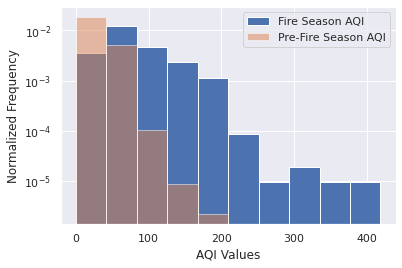

In [ ]:
pre_fire_aqi = air_and_covid['Daily_Aqi_Value'].loc[air_and_covid['Date'] < '2020-08-01']
fire_aqi = air_and_covid['Daily_Aqi_Value'].loc[air_and_covid['Date'] > '2020-08-16']

hist_range_max = pre_fire_aqi.max() if pre_fire_aqi.max() > fire_aqi.max() else fire_aqi.max()


plt.hist(fire_aqi,density=True,bins=10,range=(0,hist_range_max))
plt.hist(pre_fire_aqi, density=True, bins=10, range=(0,hist_range_max),alpha=0.5)
plt.legend(['Fire Season AQI', 'Pre-Fire Season AQI'])
plt.yscale('log')
plt.xlabel('AQI Values')
plt.ylabel('Normalized Frequency')

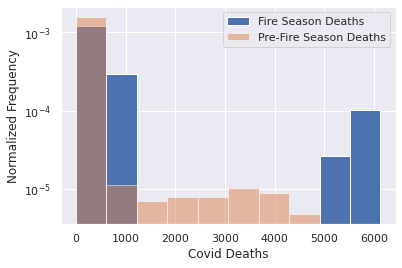

In [ ]:
pre_fire_deaths = air_and_covid['Deaths'].loc[air_and_covid['Date'] < '2020-08-01']
fire_deaths = air_and_covid['Deaths'].loc[air_and_covid['Date'] > '2020-08-16']

hist_range_max = pre_fire_deaths.max() if pre_fire_deaths.max() > fire_deaths.max() else fire_deaths.max()


plt.hist(fire_deaths,density=True,bins=10,range=(0,hist_range_max),)
plt.hist(pre_fire_deaths, density=True, bins=10, range=(0,hist_range_max),alpha=0.5)
plt.legend(['Fire Season Deaths', 'Pre-Fire Season Deaths'])
plt.xlabel('Covid Deaths')
plt.ylabel('Normalized Frequency')
plt.yscale('log')

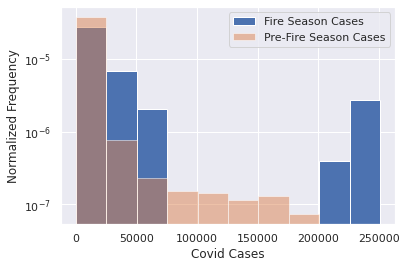

In [ ]:
pre_fire_cases = air_and_covid['Cases'].loc[air_and_covid['Date'] < '2020-08-01']
fire_cases = air_and_covid['Cases'].loc[air_and_covid['Date'] > '2020-08-16']

hist_range_max = pre_fire_cases.max() if pre_fire_cases.max() > fire_cases.max() else fire_cases.max()


plt.hist(fire_cases,density=True,bins=10,range=(0,hist_range_max))
plt.hist(pre_fire_cases, density=True, bins=10, range=(0,hist_range_max),alpha=0.5)
plt.legend(['Fire Season Cases', 'Pre-Fire Season Cases'])
plt.xlabel('Covid Cases')
plt.ylabel('Normalized Frequency')
plt.yscale('log')

In [ ]:
# plotting COVID Death Rate vs time
    #COVID Death Rate vs date






In [ ]:
# plotting AQI vs COVID Death Rate
